In [16]:
import requests

In [22]:
base = "https://api.coingecko.com/api/v3/"
url = base + "coins/list"

page = requests.get(url)

In [23]:
j = page.json()

In [25]:
import pandas as pd
df = pd.DataFrame(j)
df.head()

,id,name,symbol
0,bitcoin,Bitcoin,btc
1,litecoin,Litecoin,ltc
2,auroracoin,Auroracoin,aur
3,peercoin,Peercoin,ppc
4,dogecoin,Dogecoin,doge


In [26]:
base = "https://api.coingecko.com/api/v3/"
url = base + "coins/bitcoin/market_chart?vs_currency=eur&days=10"

page = requests.get(url)

In [27]:
j = page.json()
j

{'prices': [[1538748221182, 5706.621711482915],
  [1538751815167, 5722.906784238069],
  [1538755417839, 5723.607287518835],
  [1538759013237, 5710.487365348977],
  [1538762618711, 5702.851567215271],
  [1538766218655, 5705.043340493727],
  [1538769824638, 5709.736608819603],
  [1538773422892, 5707.9653260029145],
  [1538777012714, 5716.727553483569],
  [1538780614191, 5737.346004156692],
  [1538784224715, 5741.395730416034],
  [1538787813834, 5734.131580754123],
  [1538791419669, 5735.793544266357],
  [1538795023015, 5718.7558582241845],
  [1538798614732, 5720.275643617445],
  [1538802214917, 5723.429354105511],
  [1538805814284, 5725.407695568307],
  [1538809413528, 5722.143282229923],
  [1538813021571, 5727.60767139054],
  [1538816621088, 5726.31968321045],
  [1538820219391, 5727.725502989793],
  [1538823815559, 5729.072239712514],
  [1538827416645, 5709.223784431283],
  [1538831009164, 5710.089960041285],
  [1538834615199, 5700.452048969187],
  [1538838218762, 5707.003568554354],
  

In [28]:
df = pd.DataFrame(j['prices'], columns=['time', 'price'])
df.head()

,time,price
0,1538748221182,5706.621711
1,1538751815167,5722.906784
2,1538755417839,5723.607288
3,1538759013237,5710.487365
4,1538762618711,5702.851567


In [31]:
pd.to_datetime(df['time'], unit='ms').dt.round('1min')

0     2018-10-05 14:04:00
1     2018-10-05 15:04:00
2     2018-10-05 16:04:00
3     2018-10-05 17:04:00
4     2018-10-05 18:04:00
5     2018-10-05 19:04:00
6     2018-10-05 20:04:00
7     2018-10-05 21:04:00
8     2018-10-05 22:04:00
9     2018-10-05 23:04:00
10    2018-10-06 00:04:00
11    2018-10-06 01:04:00
12    2018-10-06 02:04:00
13    2018-10-06 03:04:00
14    2018-10-06 04:04:00
15    2018-10-06 05:04:00
16    2018-10-06 06:04:00
17    2018-10-06 07:04:00
18    2018-10-06 08:04:00
19    2018-10-06 09:04:00
20    2018-10-06 10:04:00
21    2018-10-06 11:04:00
22    2018-10-06 12:04:00
23    2018-10-06 13:03:00
24    2018-10-06 14:04:00
25    2018-10-06 15:04:00
26    2018-10-06 16:04:00
27    2018-10-06 17:04:00
28    2018-10-06 18:04:00
29    2018-10-06 19:04:00
              ...        
233   2018-10-14 10:08:00
234   2018-10-14 11:08:00
235   2018-10-14 12:08:00
236   2018-10-14 13:08:00
237   2018-10-14 14:08:00
238   2018-10-14 15:08:00
239   2018-10-14 16:08:00
240   2018-1

In [32]:
df['time'] = pd.to_datetime(df['time'], unit='ms').dt.round('1min')

In [33]:
df.set_index('time', inplace=True)
df.head()

,price
time,
2018-10-05 14:04:00,5706.621711
2018-10-05 15:04:00,5722.906784
2018-10-05 16:04:00,5723.607288
2018-10-05 17:04:00,5710.487365
2018-10-05 18:04:00,5702.851567


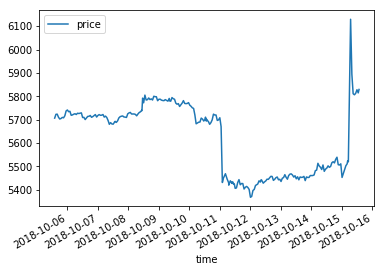

In [34]:
%matplotlib inline

df.plot()

In [36]:
j.keys()

dict_keys(['prices', 'market_caps', 'total_volumes'])

In [37]:
df.groupby(pd.Grouper(freq="d")).mean()

,price
time,
2018-10-05,5714.329355
2018-10-06,5719.972127
2018-10-07,5704.389374
2018-10-08,5760.296238
2018-10-09,5778.133439
2018-10-10,5707.672604
2018-10-11,5437.156355
2018-10-12,5432.135375
2018-10-13,5454.225036


In [46]:
# before we change any data we need to make a copy!!!

a = df.head(10).copy()
a['y'] = a['price']

In [47]:
# trick using shift()

# a['price'].shift(1)

In [48]:
# carefull I will get some warnings and it is possible that I need to make a 
# copy of everything just in case

# trick using shift()


a['x-1'] = a['price'].shift(1)
a['x-2'] = a['price'].shift(2)
a['x-3'] = a['price'].shift(3)

In [49]:
# print a 

a

,price,y,x-1,x-2,x-3
time,,,,,
2018-10-05 14:04:00,5706.621711,5706.621711,NaN,NaN,NaN
2018-10-05 15:04:00,5722.906784,5722.906784,5706.621711,NaN,NaN
2018-10-05 16:04:00,5723.607288,5723.607288,5722.906784,5706.621711,NaN
2018-10-05 17:04:00,5710.487365,5710.487365,5723.607288,5722.906784,5706.621711
2018-10-05 18:04:00,5702.851567,5702.851567,5710.487365,5723.607288,5722.906784
2018-10-05 19:04:00,5705.043340,5705.043340,5702.851567,5710.487365,5723.607288
2018-10-05 20:04:00,5709.736609,5709.736609,5705.043340,5702.851567,5710.487365
2018-10-05 21:04:00,5707.965326,5707.965326,5709.736609,5705.043340,5702.851567
2018-10-05 22:04:00,5716.727553,5716.727553,5707.965326,5709.736609,5705.043340


In [52]:
del a['price']
a.dropna(inplace=True)
a

,y,x-1,x-2,x-3
time,,,,
2018-10-05 17:04:00,5710.487365,5723.607288,5722.906784,5706.621711
2018-10-05 18:04:00,5702.851567,5710.487365,5723.607288,5722.906784
2018-10-05 19:04:00,5705.043340,5702.851567,5710.487365,5723.607288
2018-10-05 20:04:00,5709.736609,5705.043340,5702.851567,5710.487365
2018-10-05 21:04:00,5707.965326,5709.736609,5705.043340,5702.851567
2018-10-05 22:04:00,5716.727553,5707.965326,5709.736609,5705.043340
2018-10-05 23:04:00,5737.346004,5716.727553,5707.965326,5709.736609


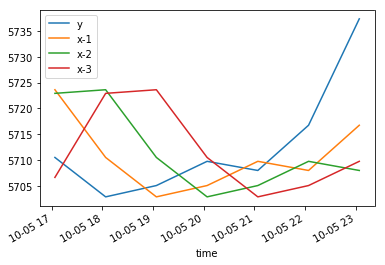

In [60]:
a.plot()

In [61]:
from sklearn.linear_model import LinearRegression

X = a[['x-1', 'x-2', 'x-3']]
y = a['y']


m = LinearRegression()
m.fit(X, y)
m.score(X, y)



0.6162187850727465

In [62]:
print(m.score(X, y))

0.6162187850727465
